In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Read data into pandas dataframe

In [2]:
df=pd.read_csv("supermarket_sales.csv")
df = df.replace('\n', ' ', regex=True)

## Inspect Data Set

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df.shape

(1000, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

## Handling Missing Values

In [7]:
df_copy=df.copy()

In [8]:
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [9]:
df.isna().sum()/len(df)

Invoice ID                 0.0
Branch                     0.0
City                       0.0
Customer type              0.0
Gender                     0.0
Product line               0.0
Unit price                 0.0
Quantity                   0.0
Tax 5%                     0.0
Total                      0.0
Date                       0.0
Time                       0.0
Payment                    0.0
cogs                       0.0
gross margin percentage    0.0
gross income               0.0
Rating                     0.0
dtype: float64

In [10]:
df.fillna(df.median(numeric_only=True),inplace = True)

In [11]:
df.fillna(df.mode().iloc[0], inplace=True)

## Removing Duplicates

In [12]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df[df.duplicated()== True]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating


In [15]:
df.drop_duplicates(inplace=True)

# Handling Outliers

In [16]:
specific_cols = ['Unit price','Quantity']

Q1 = df[specific_cols].quantile(0.25)
Q3 = df[specific_cols].quantile(0.75)
IQR = Q3 - Q1

outlier_condition = (df[specific_cols] < (Q1 - 1.5 * IQR)) | (df[specific_cols] > (Q3 + 1.5 * IQR))
df.loc[outlier_condition.any(axis=1), specific_cols] = np.nan

In [17]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [18]:
# Removing outliers
df.dropna(inplace=True)

## Standardizing categorical values

In [19]:
## Converts all strings to lowercase for consistency

In [20]:
df = df.apply(lambda x: x.str.strip().str.lower() if x.dtype == "object" else x)

## Exploratory Analysis

In [21]:
## Summary Statistics

In [22]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [23]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace= True)

# Univariate Anlaysis

<Axes: xlabel='Rating', ylabel='Count'>

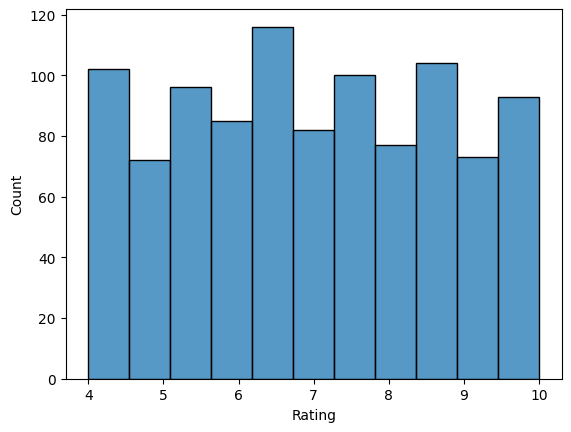

In [24]:
sns.histplot(df['Rating']) 

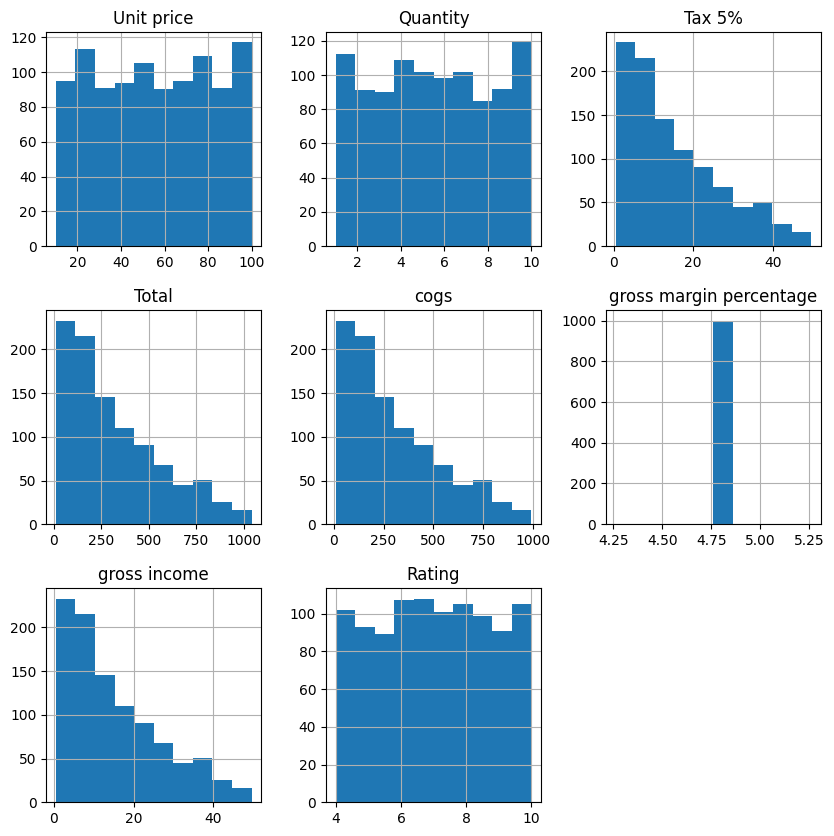

In [25]:
df.hist(figsize=(10,10))
plt.title("Distribution of Numerical Features")
plt.show() 

 The tax has right skew
 Means most of the tax is collected between 0 and 20 percent
 Gross margin has constant value 

<Axes: xlabel='Payment', ylabel='count'>

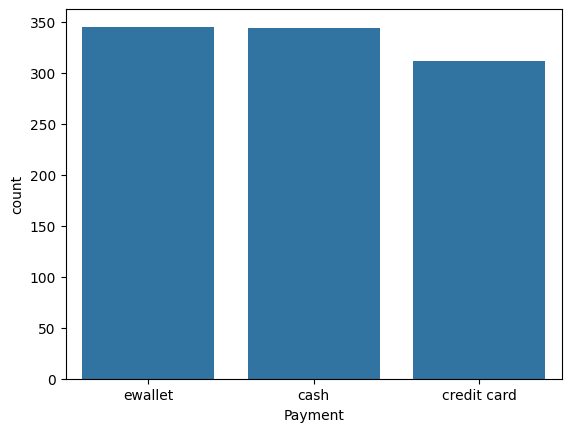

In [26]:
sns.countplot(data=df, x='Payment')

<Axes: xlabel='Branch', ylabel='count'>

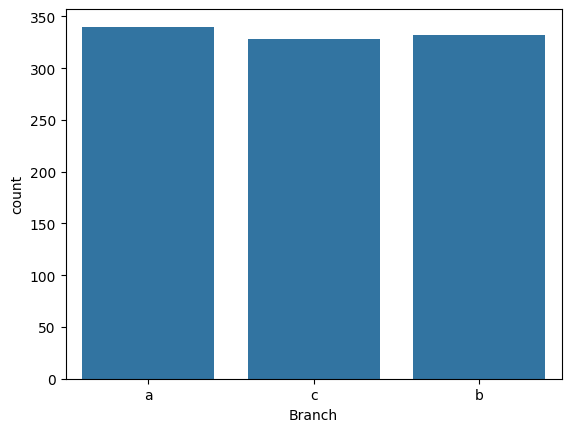

In [27]:
sns.countplot(data=df, x='Branch')

# Multivariate Analysis

## Scatter plot

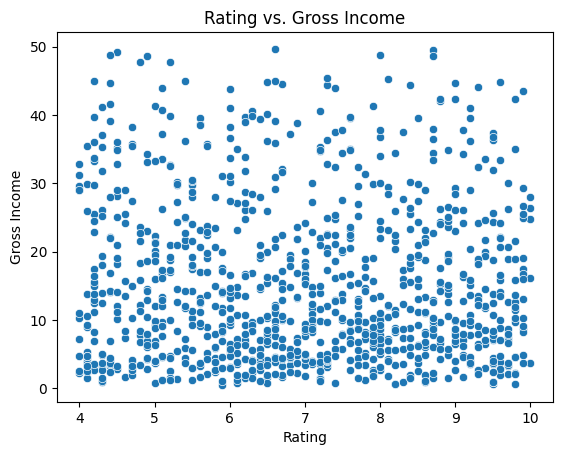

In [28]:
sns.scatterplot(x='Rating', y='gross income', data=df)

plt.title('Rating vs. Gross Income')
plt.xlabel('Rating')
plt.ylabel('Gross Income')
plt.show()

## Box plots

<Axes: xlabel='Branch', ylabel='gross income'>

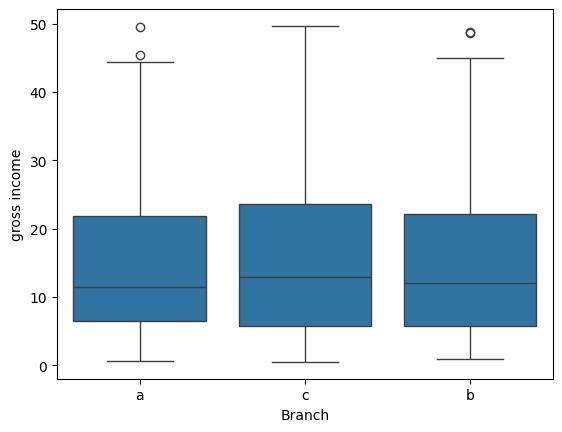

In [29]:
sns.boxplot(x=df['Branch'], y=df['gross income'])

<Axes: xlabel='Gender', ylabel='gross income'>

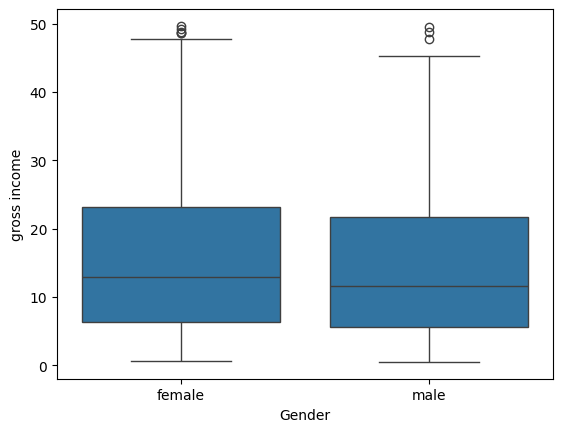

In [30]:
sns.boxplot(x=df['Gender'], y=df['gross income'])

## Viloin plot

<Axes: xlabel='Gender', ylabel='gross income'>

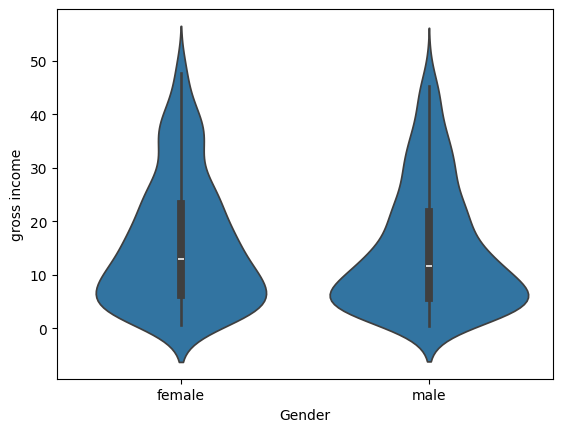

In [46]:
sns.violinplot(x='Gender', y='gross income', data=df)

<Axes: xlabel='Payment', ylabel='Unit price'>

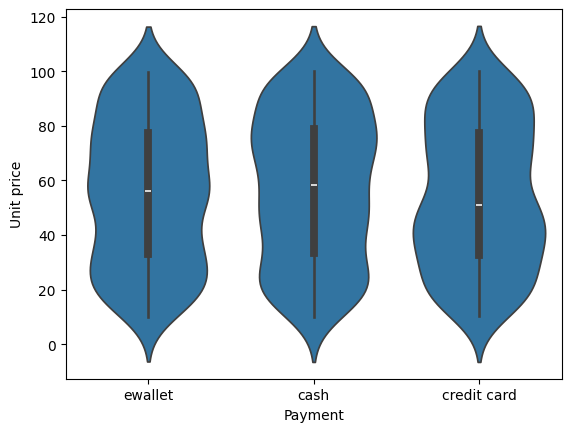

In [47]:
sns.violinplot(x='Payment', y='Unit price', data=df)

## Bar plot

<Axes: xlabel='Gender', ylabel='gross income'>

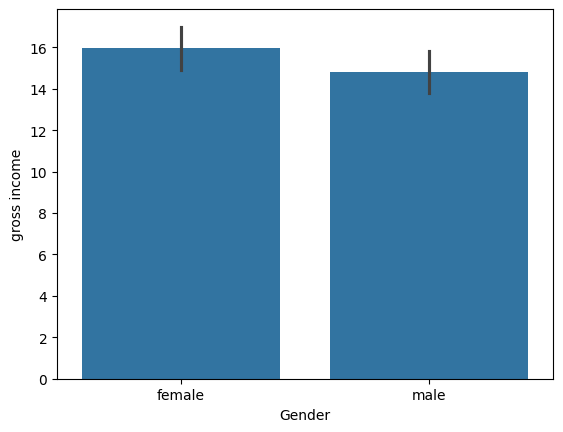

In [52]:
sns.barplot(x='Gender', y='gross income', data=df)

## Pair plots

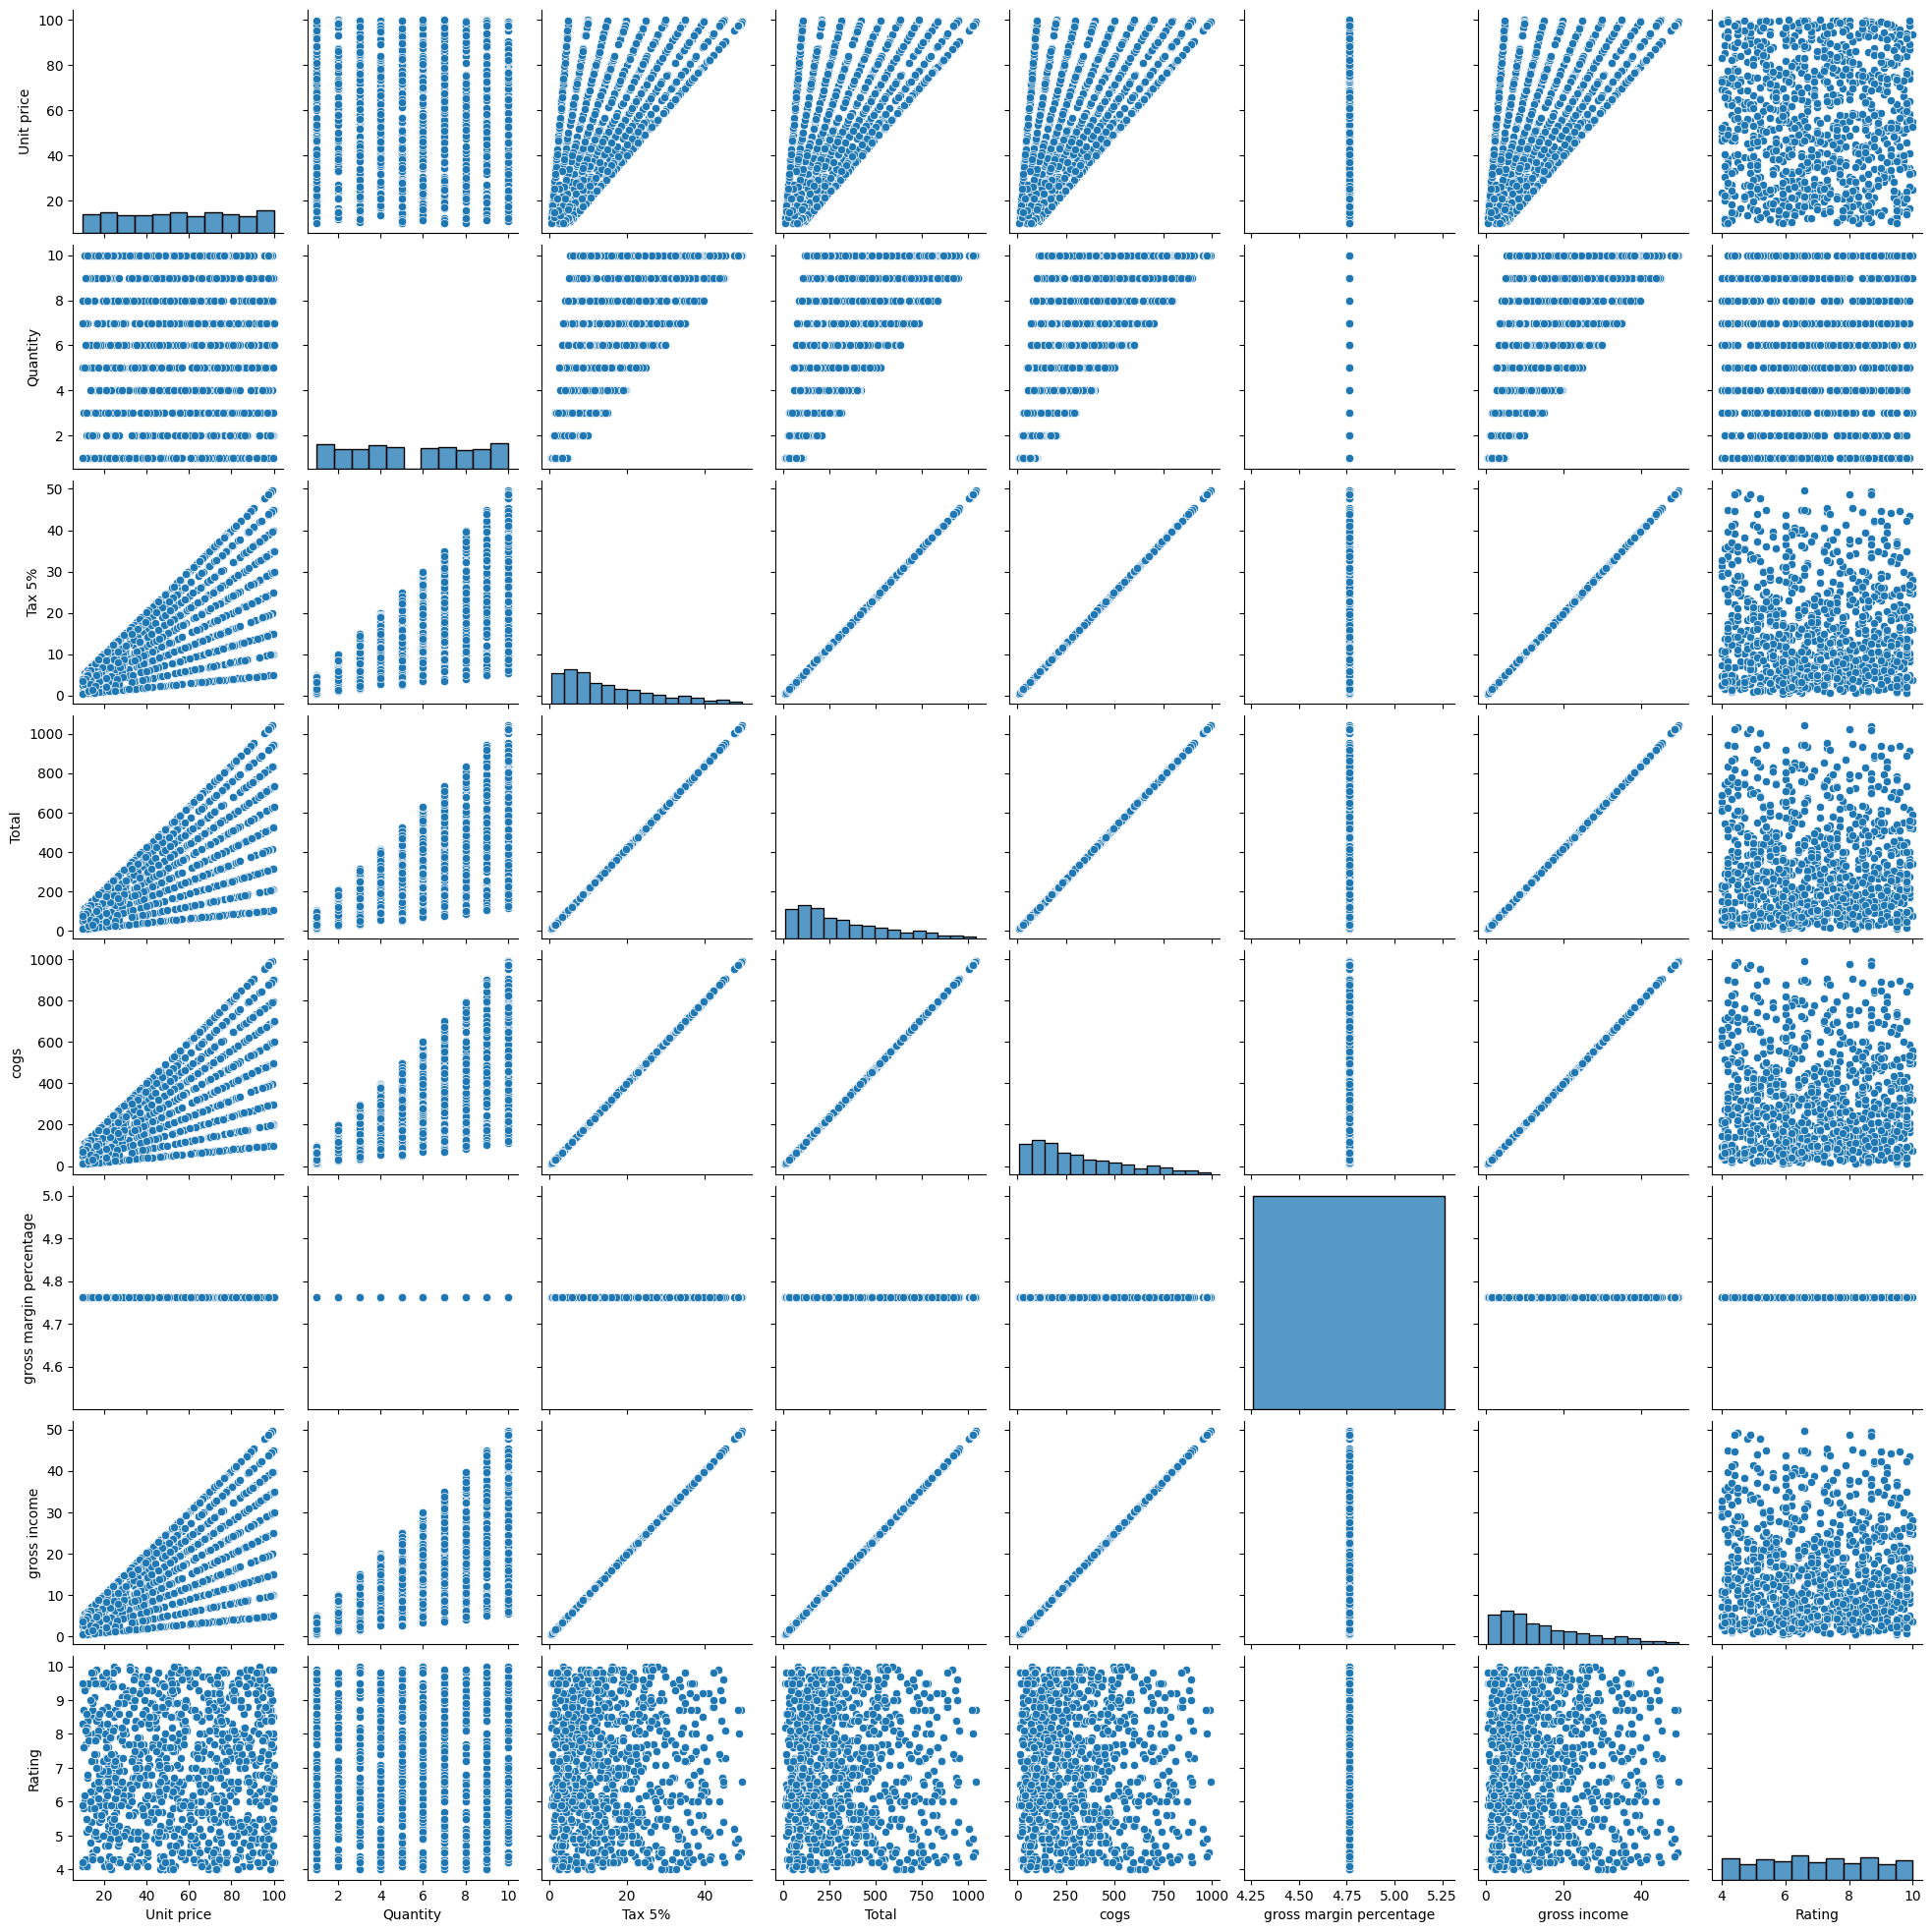

In [38]:
sns.pairplot(df)

## Covariance analysis,Heatmap

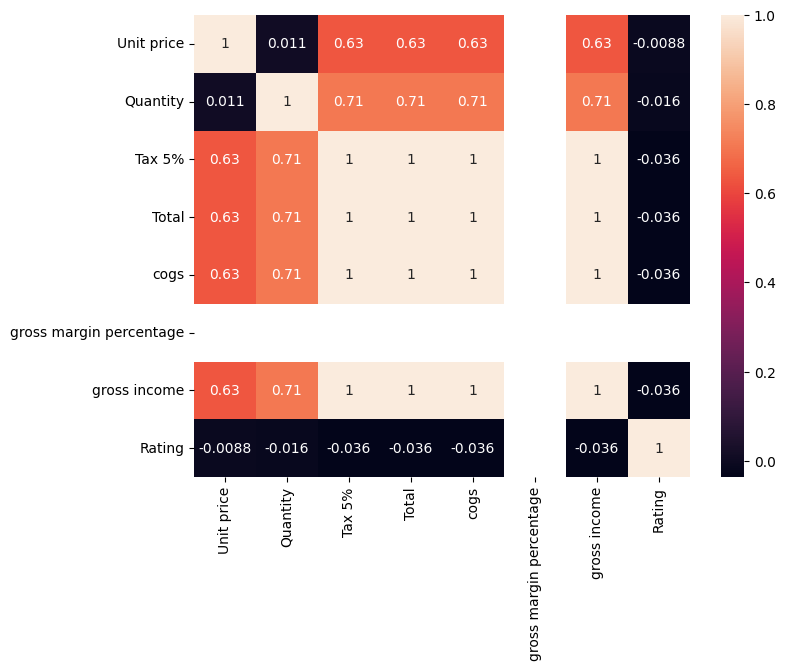

In [45]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True)
plt.show()

## Grouped comparsions

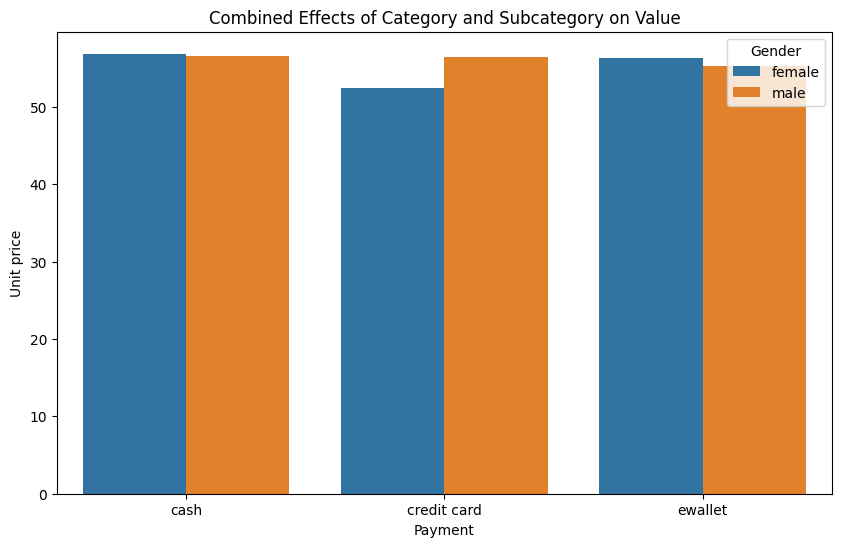

In [56]:
grouped_df = df.groupby(['Payment', 'Gender'])['Unit price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Payment', y='Unit price', hue='Gender', data=grouped_df)
plt.title('Combined Effects of Category and Subcategory on Value')
plt.show()

In [57]:
df.to_csv("cleaned_data.csv", index=False)